# Uber supply-demand gap

In [794]:
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb
import datetime

## Load the data

In [795]:
uber_df = pd.read_csv("Uber Request Data.csv")

In [796]:
uber_df.shape #6745 rows, 6 columns

uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


## Data Cleaning and Manipulation

### checking for duplicate requests

In [797]:
uber_df.duplicated(subset=['Request id']).sum() # returns 0; which means no duplicate requests are present in the dataset

0

### checking null values

In [798]:
uber_df.isnull().sum()
#Output:
#Request id              0
#Pickup point            0
#Driver id            2650
#Status                  0
#Request timestamp       0
#Drop timestamp       3914

#From the above output, we can see that Driver id and Drop timestamp has null values or na values which is possible for the rides
#not being completed either due to cancellation by Driver or non-availability of cabs at the time of request.
#So no need to remove the null values from these columns

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

### Converting columns to proper data type

In [799]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [800]:
uber_df['Pickup point'] = uber_df['Pickup point'].astype('category')
uber_df['Status'] = uber_df['Status'].astype('category')
uber_df['Request id'] = uber_df['Request id'].astype('category')
uber_df['Driver id'] = uber_df['Driver id'].astype('category')
uber_df['Request timestamp'] = pd.to_datetime(uber_df['Request timestamp'])
uber_df['Drop timestamp'] = pd.to_datetime(uber_df['Drop timestamp'])

uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null category
Pickup point         6745 non-null category
Driver id            4095 non-null category
Status               6745 non-null category
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: category(4), datetime64[ns](2)
memory usage: 530.2 KB


### Deriving new columns for analysis

In [801]:
# combining number of requests getting cancelled or non-availability of cars, into one category

uber_df.loc[(uber_df['Status'] == 'Cancelled') | (uber_df['Status'] == 'No Cars Available'), 'Cancel Or NA'] = "Yes"
uber_df.loc[(uber_df['Status'] == 'Trip Completed'), 'Cancel Or NA'] = "No"

uber_df['Cancel Or NA'] = uber_df['Cancel Or NA'].astype('category')

In [802]:
# Deriving 'hour' column from the 'Request timestamp' column

uber_df['hour'] = uber_df['Request timestamp'].dt.hour

# Deriving 'time slab' column from the 'hour' column
uber_df.loc[(uber_df['hour'] >= 0) & (uber_df['hour'] <= 5), 'time slab'] = "Early Morning"
uber_df.loc[(uber_df['hour'] >= 6) & (uber_df['hour'] <= 11), 'time slab'] = "Morning"
uber_df.loc[(uber_df['hour'] >= 12) & (uber_df['hour'] <= 16), 'time slab'] = "Afternoon"
uber_df.loc[(uber_df['hour'] >= 17) & (uber_df['hour'] <= 20), 'time slab'] = "Evening"
uber_df.loc[(uber_df['hour'] >= 21) & (uber_df['hour'] <= 23), 'time slab'] = "Late Evening"

uber_df['time slab'] = uber_df['time slab'].astype('category')
uber_df['hour'] = uber_df['hour'].astype('category')

## Data Analysis

In [803]:
uber_df.describe()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Cancel Or NA,hour,time slab
count,6745.0,6745,4095.0,6745,6745,2831,6745,6745.0,6745
unique,6745.0,2,300.0,3,5618,2598,2,24.0,5
top,6766.0,City,27.0,Trip Completed,2016-11-07 19:02:00,2016-12-07 21:04:00,Yes,18.0,Morning
freq,1.0,3507,22.0,2831,6,4,3914,510.0,2072
first,NaN,NaN,NaN,NaN,2016-07-13 00:00:24,2016-07-13 00:01:12,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2016-12-07 23:54:00,2016-12-07 23:45:00,NaN,NaN,NaN


In [804]:
pd.Categorical(uber_df['Pickup point']).describe()

# More requests are raised from City to Airport commute as compared to Airport to City

,counts,freqs
categories,,
Airport,3238,0.480059
City,3507,0.519941


In [805]:
pd.Categorical(uber_df['Status']).describe()

# As seen, more number of requests get either cancel or cars are not available as compared to requests getting completed

,counts,freqs
categories,,
Cancelled,1264,0.187398
No Cars Available,2650,0.392884
Trip Completed,2831,0.419718


### Performing univariate analysis

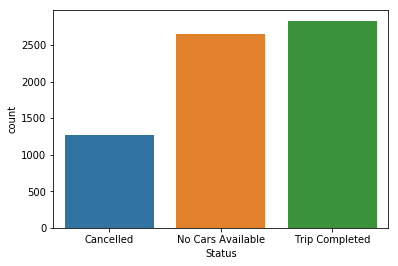

In [806]:
sb.countplot(x=uber_df['Status'])
mpl.show()

# we can see from the graph below that there are more number of requests which have not been fulfilled because of non-availability
# of cars as compared to the trips being cancelled

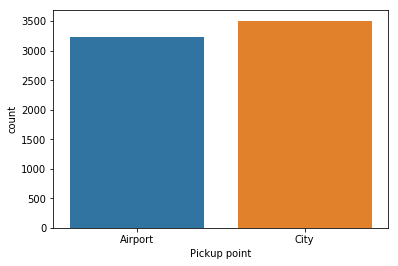

In [807]:
sb.countplot(x=uber_df['Pickup point'])
mpl.show()

# Observation:
# There are more of requests being placed from City to Airport as compared to Airport to City

### Performing bivariate analysis

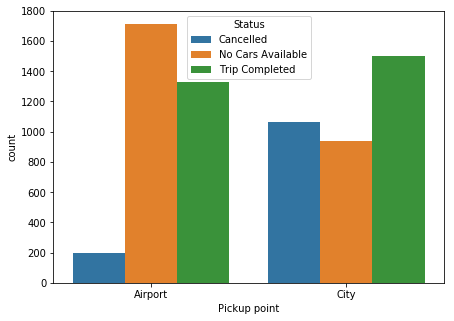

In [808]:
# Lets get more insight by further dividing the above plot for different 'Status' of trips

mpl.figure(figsize=(7, 5))
sb.countplot(x='Pickup point', hue='Status', data=uber_df)
mpl.show()

# Observations:
# a) more trips are getting cancelled from City to Airport
# b) more trips have non-availability of cars in the case of Airport to City
# c) very less trips get cancelled from Airport to City (this could be due to less number of availability of cars). Since less cars are
#    available, less trips will get cancelled.

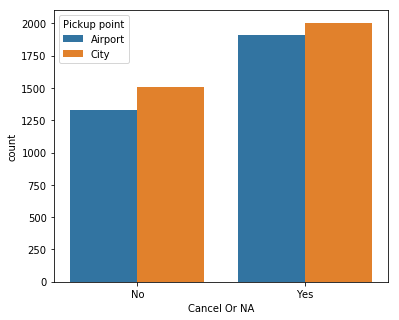

In [809]:
# Combining both 'cancelled' and 'no cars available' into one and analysing the same

mpl.figure(figsize=(6, 5))
sb.countplot(x='Cancel Or NA', hue='Pickup point', data=uber_df)
mpl.show()

# Observations:
# Trips get cancelled or have non-availability of cars, more in case of City to Airport

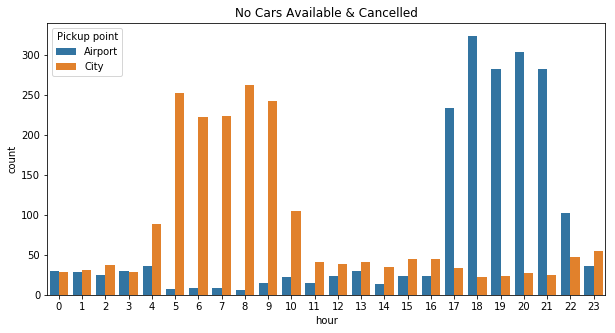

In [810]:
# Analysing the Cancelled and 'No Cars Available' on hourly basis
temp_df = uber_df[uber_df['Cancel Or NA'] == 'Yes']

mpl.figure(figsize=(10, 5))
sb.countplot(x = 'hour', hue = 'Pickup point', data=temp_df)
mpl.title('No Cars Available & Cancelled')

mpl.show()

# Observations:
# More number of requests which get cancelled or have no cars available are between:
# a) 4am-10am from City to Airport
# b) 5pm-10pm from Airport to City

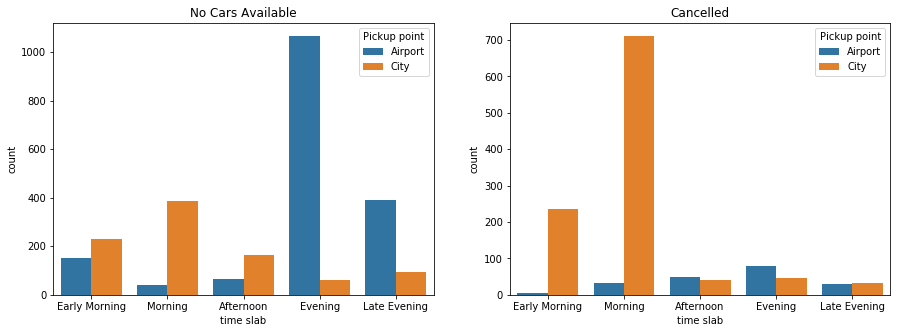

In [811]:
# Analysing individually the number of trips getting 'Cancelled' and 'No Cars Available' with respect to the 'time slab' of the day

temp_df1 = uber_df[uber_df['Status'] == 'No Cars Available']
temp_df2 = uber_df[uber_df['Status'] == 'Cancelled']

mpl.figure(figsize=(15, 5))

mpl.subplot(1, 2, 1)
sb.countplot(x = 'time slab', hue = 'Pickup point', order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Evening'], data=temp_df1)
mpl.title('No Cars Available')

mpl.subplot(1, 2, 2)
sb.countplot(x = 'time slab', hue = 'Pickup point', order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Evening'], data=temp_df2)
mpl.title('Cancelled')

mpl.show()

# Observations:
# a) More number of requests are not getting any available cars during:
#         i) 'Morning' and 'Afternoon' hours from City to Airport
#        ii) 'Evening' and 'Late Evening' hours from Airport to City
# b) Huge number of request are getting cancelled in:
#         i) 'Morning' hours from City to Airport

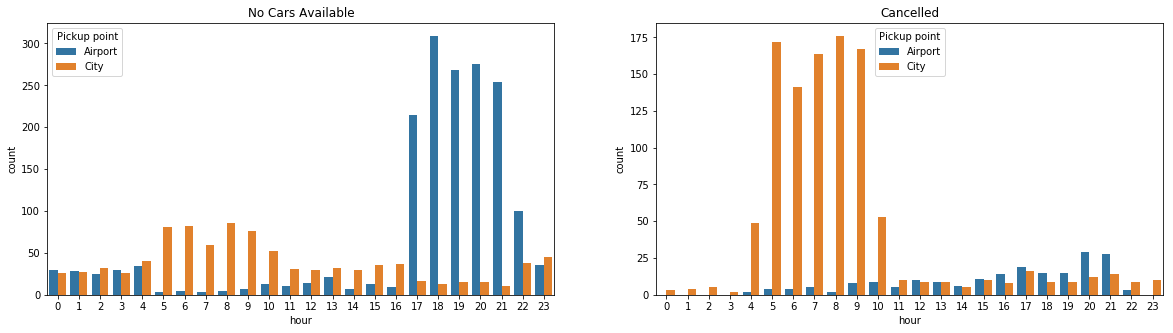

In [812]:
# Lets observe individually both 'Cancelled' and 'No Cars Available' statuses on hourly basis

temp_df1 = uber_df[uber_df['Status'] == 'No Cars Available']
temp_df2 = uber_df[uber_df['Status'] == 'Cancelled']

mpl.figure(figsize=(20, 5))

mpl.subplot(1, 2, 1)
sb.countplot(x = 'hour', hue = 'Pickup point', data=temp_df1)
mpl.title('No Cars Available')

mpl.subplot(1, 2, 2)
sb.countplot(x = 'hour', hue = 'Pickup point', data=temp_df2)
mpl.title('Cancelled')

mpl.show()

# Observations:
# a) More number of requests are not getting any available cars between:
#        i) 5am-10am from City to Airport
#       ii) 5pm-10pm from Airport to City
# b) More number of requests are getting cancelled between:
#        i) 4am-10am hours from City to Airport

### Computing Supply Demand Gap

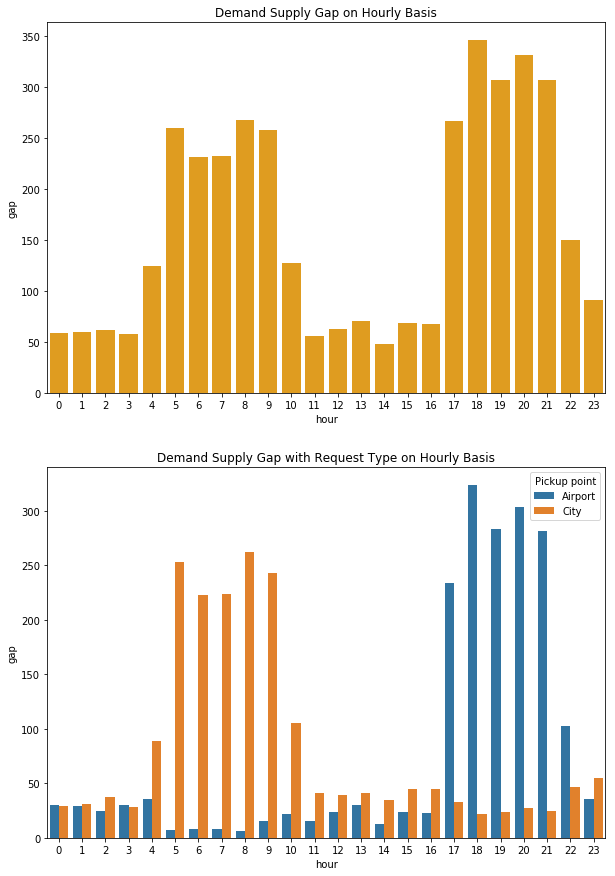

In [813]:
dsr_df = pd.DataFrame()
dsr_df['demand'] = (uber_df.groupby(by=['hour', 'Pickup point'])['hour'].count())

temp_df = uber_df[uber_df['Cancel Or NA'] == 'No']

dsr_df['supply'] = (temp_df.groupby(by=['hour', 'Pickup point'])['hour'].count())
dsr_df.reset_index(inplace=True)

dsr_df['gap'] = dsr_df['demand'] - dsr_df['supply']


mpl.figure(figsize=(10, 15))
mpl.subplot(2, 1, 1)
sb.barplot(x='hour', y='gap', estimator=np.sum, ci=None, color='orange', data=dsr_df)
mpl.title('Demand Supply Gap on Hourly Basis')

mpl.subplot(2, 1, 2)
sb.barplot(x='hour', y='gap', hue='Pickup point', data=dsr_df)
mpl.title('Demand Supply Gap with Request Type on Hourly Basis')
mpl.show()

# Observations:
# a) The demand supply gap is highest between 6-9pm (as evident from plot 1)
# b) The demand supply gap is huge for requests from Airport to City between 6-9pm (as evident from plot 2)

### Conclusion

The following behaviour is observed as a whole:
a) More number of requests are not getting any available cars during:
        i) 'Morning' hours (i.e. from 5am-10am) from City to Airport
       ii) 'Evening' and 'Late Evening' hours (i.e. from 5pm-10pm) from Airport to City
b) Huge number of request are getting cancelled in:
        i) 'Morning' hours (i.e. from 5am-10am) from City to Airport
c) The demand supply gap is highest between 6-9pm ie. in 'Evening' hours
d) The demand supply gap is huge for requests from Airport to City between 6-9pm

### Reason for Demand-Supply Gap

a) During Morning hours, the demand supply gap (caused because of City-Airport requests) may exist because the drivers may not be getting return rides from Airport to City and thus they will be earning less if they take rides from City to Airport in Morning hours.

b) During Evening hours, the demand supply gap (caused because of Airport-City requests) may exist because of non-availability of cars on Airport during those hours. Since the drivers are not taking up rides from City-Airport, there are less number of cars available on Airport for Airport-City rides.

c) Another reason why drivers are cancelling the requests from City-Airport during morning hours is the long waiting time. If they take ride in Morning they have to wait until Night to get the ride back from Airport-City. So they are less interested in taking up such rides.

### Recommendations

a) The drivers can be given some compensatory amount for the time they wait at Airport for the return ride on the same day.

b) The ride fare for City-Airport requests (during Morning hours) and Airport-City requests (during Evening hours) can be increased to attract drivers for such rides.